In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [3]:
# 시계열 데이터 생성
np.random.seed(42)
dates = pd.date_range(start='2023-01-01',periods=100, freq='D')
values = np.random.randn(100) *10  # 정규 분포를 다르는 데이터 생성

# 이상치 추가
values[20] = 50 #이상치 추가


# 데이터 프레임 생성
data = pd.DataFrame({'Date':dates , 'Value':values})

# 이상치 탐지 
z_scores = np.abs(stats.zscore(data['Value'])) # Z-score계산
threshold= 3 #이상치 임계값 설정
outliers = z_scores > threshold # Z- score 가 임계값을 초과하는지 확인

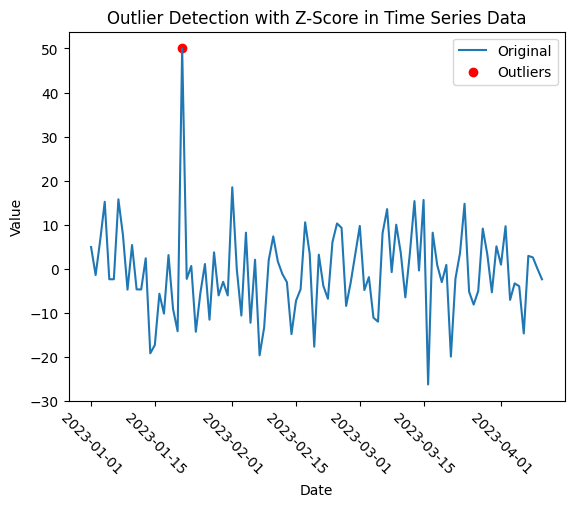

Detected Outliers:
20    50.0
Name: Value, dtype: float64


In [5]:
# 이상치 시각화 
plt.plot(data['Date'], data['Value'], label='Original')
plt.scatter(data[outliers]['Date'], data[outliers]['Value'], color='red', label='Outliers')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Outlier Detection with Z-Score in Time Series Data')
plt.xticks(rotation=-45)
plt.legend()
plt.show()
 
# 이상치 출력 
outlier_values = data[outliers]['Value']
print("Detected Outliers:")
print(outlier_values)